In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'acc':[],
           'f1':[],
           'wd':[]}

In [4]:
g = 2
lr = 1.0e-5
weight_decays = [0.01, 0.1]


for wd in weight_decays:
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=20,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          accumulation_steps=2,
                          gamma=g,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search microsoft/deberta-base, learning rate 1e-05 focal loss, gamma: 2 wd: 0.01


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.7396	Val Loss:	1.0969	Accuracy:	0.3025	F1:	0.1548
2 / 20: Train Loss:	0.7253	Val Loss:	1.0737	Accuracy:	0.3361	F1:	0.1985
3 / 20: Train Loss:	0.6122	Val Loss:	0.8639	Accuracy:	0.6471	F1:	0.6288
4 / 20: Train Loss:	0.4194	Val Loss:	0.7393	Accuracy:	0.7143	F1:	0.7053
5 / 20: Train Loss:	0.2938	Val Loss:	0.6938	Accuracy:	0.6891	F1:	0.6769
6 / 20: Train Loss:	0.2212	Val Loss:	0.6195	Accuracy:	0.7563	F1:	0.7521
7 / 20: Train Loss:	0.1707	Val Loss:	0.5925	Accuracy:	0.7815	F1:	0.7778
8 / 20: Train Loss:	0.1083	Val Loss:	0.5678	Accuracy:	0.8067	F1:	0.8066
9 / 20: Train Loss:	0.0810	Val Loss:	0.5827	Accuracy:	0.7983	F1:	0.7985
10 / 20: Train Loss:	0.0549	Val Loss:	0.5642	Accuracy:	0.8151	F1:	0.8151
11 / 20: Train Loss:	0.0391	Val Loss:	0.5749	Accuracy:	0.7899	F1:	0.7839
12 / 20: Train Loss:	0.0252	Val Loss:	0.6378	Accuracy:	0.7647	F1:	0.7620
13 / 20: Train Loss:	0.0128	Val Loss:	0.5644	Accuracy:	0.8067	F1:	0.8070
No improvement for 3 epochs. Stopping early.
best (higgest m

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.dense.bias', 'classifier.weight', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	0.7396	Val Loss:	1.0969	Accuracy:	0.3025	F1:	0.1548
2 / 20: Train Loss:	0.7253	Val Loss:	1.0737	Accuracy:	0.3361	F1:	0.1985
3 / 20: Train Loss:	0.6122	Val Loss:	0.8639	Accuracy:	0.6471	F1:	0.6288
4 / 20: Train Loss:	0.4194	Val Loss:	0.7392	Accuracy:	0.7143	F1:	0.7053
5 / 20: Train Loss:	0.2937	Val Loss:	0.6938	Accuracy:	0.6891	F1:	0.6769
6 / 20: Train Loss:	0.2212	Val Loss:	0.6195	Accuracy:	0.7563	F1:	0.7521
7 / 20: Train Loss:	0.1708	Val Loss:	0.5925	Accuracy:	0.7815	F1:	0.7778
8 / 20: Train Loss:	0.1085	Val Loss:	0.5680	Accuracy:	0.8067	F1:	0.8066
9 / 20: Train Loss:	0.0810	Val Loss:	0.5815	Accuracy:	0.7983	F1:	0.7985
10 / 20: Train Loss:	0.0545	Val Loss:	0.5652	Accuracy:	0.8151	F1:	0.8151
11 / 20: Train Loss:	0.0384	Val Loss:	0.5728	Accuracy:	0.7983	F1:	0.7930
12 / 20: Train Loss:	0.0244	Val Loss:	0.6437	Accuracy:	0.7563	F1:	0.7528
13 / 20: Train Loss:	0.0129	Val Loss:	0.5665	Accuracy:	0.8151	F1:	0.8167
14 / 20: Train Loss:	0.0066	Val Loss:	0.5692	Accuracy:	0.798

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
results = {'acc': [0.8059701492537313, 0.7910447761194029],
 'f1': [0.8079042457091238, 0.7946300471408075],
 'wd': [0.01, 0.1]}

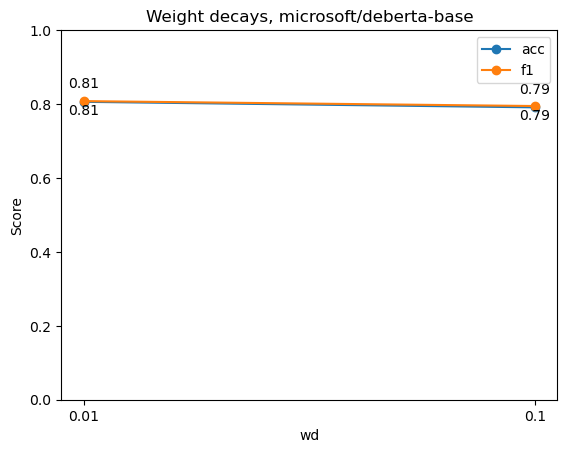

In [7]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Weight decays, {model_checkpoint}', 'wd')